## Imports

In [37]:
import os
import glob

#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Image processing
import cv2 as cv

In [2]:
#Dataframe classifying the actions
train_action = pd.read_csv("data/Training_set.csv")
test_action = pd.read_csv("data/Testing_set.csv")

In [3]:
train_action.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


## Looking at the data

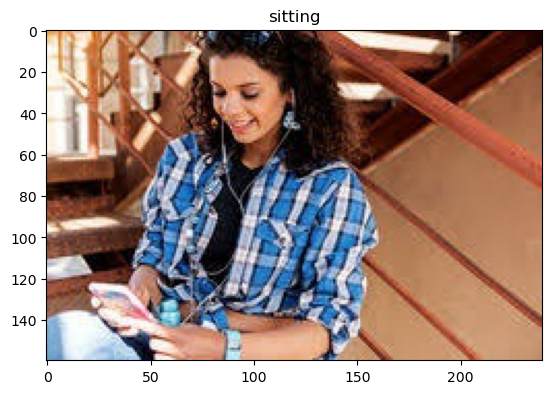

In [4]:
#Printing the images along with their respective action

img = cv.imread('data/train/' + train_action.filename[0])
plt.title(train_action.label[0])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

In [5]:
test_action.shape

(5400, 1)

There are 12,600 images in the training dataset. Creating a function which will randomly sample a image from the set and print the image along with its labeled action.

In [6]:
#Sample images and their labels in the training data


def show_img_train():
    img_num = np.random.randint(0,12599)
    img = cv.imread('data/train/' + train_action.filename[img_num])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(train_action.label[img_num])

def show_img_test():
    img_num = np.random.randint(0,5399)
    img = cv.imread('data/test/' + test_action.filename[img_num])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

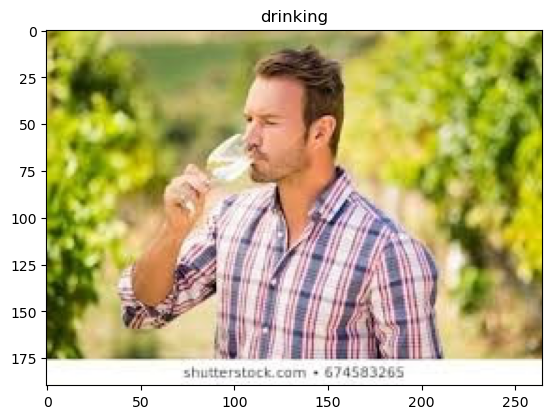

In [7]:
show_img_train()

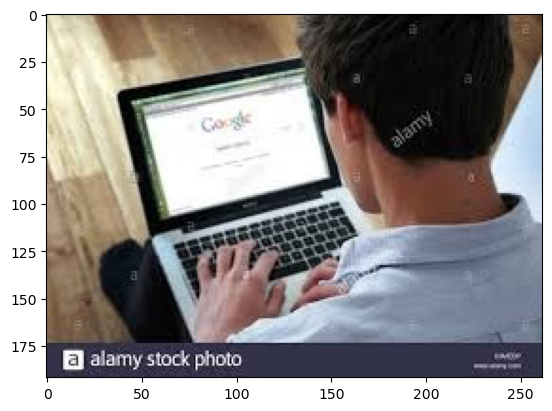

In [8]:
show_img_test()

Note that the images from the test set do not contain the labels. That is for the model to predict.

In [9]:
train_action.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

The output classes for the image classification are balanced. This reduces a step in pre-processing which deals with imbalanced classes using techniques such as SMOTE, under-sampling, etc.

## Preprocessing

(160, 240, 3)


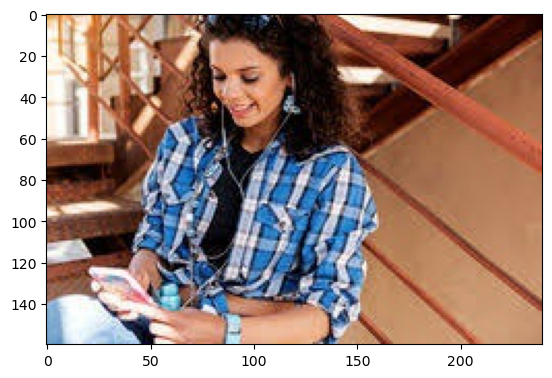

In [15]:
img = cv.imread('data/train/' + train_action.filename[0])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));
print(img.shape)

### Create the directory for resized images 

In [34]:
#create resized directory in the current project folder
parent_dir = os.getcwd()
directory = 'resized'
path = os.path.join(parent_dir, directory)

os.mkdir(path)
print('Created "resized" folder')

FileExistsError: [Errno 17] File exists: '/Users/nikhil/Portfolio/human-action-recognition/resized'

In [36]:
filename = train_action.filename[0]
cv.imwrite('./resized/' + filename ,resized)

True

## RESIZE script 

In [ ]:
#resizing the images to fit the VGG16 model

#Declaring the dimensions
width = 224
height = 224
dim = (width, height)

#filename 
filename = train_action.filename[0]

#Resize and store function

def resize_store(img, filename, dim):
    '''This function will take an image, resize it and output into '/resized' folder in the same directory'''
    resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB));
    cv.imwrite('./resized/' + filename ,resized)

## Modified Func.

In [51]:
train_img = [cv.imread(file) for file in glob.glob(os.getcwd() + "/data/train/*.jpg")]
print(len(train_img))

12601


AttributeError: 'list' object has no attribute 'shape'